# An Analysis of Yield Tokenization and Arbitrage Opportunities for Liquid Restaking Tokens on Pendle

- What are the drivers of the fixed yields? Is there a correlation between yields and the token price in which the reward are being distributed?
- How correlated are each LRTs between each other?
- How are the various tenors correlated?
- Is there also a liquidity factor: i,e llliquid pools outperform? Why do some LRT offer more yield than others because that should not exist?
- Are there any possible arbitrage strategies that can be created?

YT/PT data from pendle.
Underlying data from Yahoo finance.

In [21]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import prepare_token_data, prepare_price_data
import api.address_constants as ac
from datetime import datetime

sns.set(style='whitegrid')

# Data paths
eETH_underlying_path = 'data/eETH/EETH-USD.csv'
eETH_tvl_path = 'data/eETH/eETH_tvl_data.csv'
etherfi_eETH_yt_jun_path = 'data/eETH/etherfi_eETH_Jun_yt_ohlcv_data.csv'
etherfi_eETH_pt_jun_path = 'data/eETH/etherfi_eETH_Jun_pt_ohlcv_data.csv'
etherfi_eETH_yt_sep_path = 'data/eETH/etherfi_eETH_Sep_yt_ohlcv_data.csv'
etherfi_eETH_pt_sep_path = 'data/eETH/etherfi_eETH_Sep_pt_ohlcv_data.csv'
etherfi_eETH_yt_dec_path = 'data/eETH/etherfi_eETH_Dec_yt_ohlcv_data.csv'
etherfi_eETH_pt_dec_path = 'data/eETH/etherfi_eETH_Dec_pt_ohlcv_data.csv'
zircuit_eETH_yt_jun_path = 'data/eETH/zircuit_eETH_Jun_yt_ohlcv_data.csv'
zircuit_eETH_pt_jun_path = 'data/eETH/zircuit_eETH_Jun_pt_ohlcv_data.csv'

ezETH_underlying_path = 'data/ezETH/EZETH-USD.csv'
ezETH_yt_sep_path = 'data/ezETH/ezETH_Sep_yt_ohlcv_data.csv'
ezETH_pt_sep_path = 'data/ezETH/ezETH_Sep_pt_ohlcv_data.csv'
ezETH_yt_dec_path = 'data/ezETH/ezETH_Dec_yt_ohlcv_data.csv'
ezETH_pt_dec_path = 'data/ezETH/ezETH_Dec_pt_ohlcv_data.csv'

pufETH_underlying_path = 'data/pufETH/PUFETH-USD.csv'
pufETH_yt_jun_path = 'data/pufETH/pufETH_Jun_yt_ohlcv_data.csv'
pufETH_pt_jun_path = 'data/pufETH/pufETH_Jun_pt_ohlcv_data.csv'
pufETH_yt_sep_path = 'data/pufETH/pufETH_Sep_yt_ohlcv_data.csv'
pufETH_pt_sep_path = 'data/pufETH/pufETH_Sep_pt_ohlcv_data.csv'

uniETH_underlying_path = 'data/uniETH/UNIETH-USD.csv'
uniETH_yt_jun_path = 'data/uniETH/uniETH_Jun_yt_ohlcv_data.csv'
uniETH_pt_jun_path = 'data/uniETH/uniETH_Jun_pt_ohlcv_data.csv'
uniETH_yt_sep_path = 'data/uniETH/uniETH_Sep_yt_ohlcv_data.csv'
uniETH_pt_sep_path = 'data/uniETH/uniETH_Sep_pt_ohlcv_data.csv'

# Load the data
etherfi_eETH_jun_df = prepare_token_data(eETH_underlying_path, etherfi_eETH_yt_jun_path, etherfi_eETH_pt_jun_path, ac.etherfi_eETH_Jun_start_date, ac.expiry_date_jun)
etherfi_eETH_sep_df = prepare_token_data(eETH_underlying_path, etherfi_eETH_yt_sep_path, etherfi_eETH_pt_sep_path, ac.etherfi_eETH_Sep_start_date, ac.expiry_date_sep)
etherfi_eETH_dec_df = prepare_token_data(eETH_underlying_path, etherfi_eETH_yt_dec_path, etherfi_eETH_pt_dec_path, ac.etherfi_eETH_Dec_start_date, ac.expiry_date_dec)
zircuit_eETH_jun_df = prepare_token_data(eETH_underlying_path, zircuit_eETH_yt_jun_path, zircuit_eETH_pt_jun_path, ac.zircuit_eETH_Jun_start_date, ac.expiry_date_jun)

ezETH_sep_df = prepare_token_data(ezETH_underlying_path, ezETH_yt_sep_path, ezETH_pt_sep_path, ac.ezETH_Sep_start_date, ac.expiry_date_sep)
ezETH_dec_df = prepare_token_data(ezETH_underlying_path, ezETH_yt_dec_path, ezETH_pt_dec_path, ac.ezETH_Dec_start_date, ac.expiry_date_dec)

pufETH_jun_df = prepare_token_data(pufETH_underlying_path, pufETH_yt_jun_path, pufETH_pt_jun_path, ac.pufETH_Jun_start_date, ac.expiry_date_jun)
pufETH_sep_df = prepare_token_data(pufETH_underlying_path, pufETH_yt_sep_path, pufETH_pt_sep_path, ac.pufETH_Sep_start_date, ac.expiry_date_sep)

uniETH_jun_df = prepare_token_data(uniETH_underlying_path, uniETH_yt_jun_path, uniETH_pt_jun_path, ac.uniETH_Jun_start_date, ac.expiry_date_jun)
uniETH_sep_df = prepare_token_data(uniETH_underlying_path, uniETH_yt_sep_path, uniETH_pt_sep_path, ac.uniETH_Sep_start_date, ac.expiry_date_sep)

dfs = [etherfi_eETH_jun_df, etherfi_eETH_sep_df, etherfi_eETH_dec_df, zircuit_eETH_jun_df, ezETH_sep_df, ezETH_dec_df, pufETH_jun_df, pufETH_sep_df, uniETH_jun_df, uniETH_sep_df]
jun_dfs = [etherfi_eETH_jun_df, zircuit_eETH_jun_df, pufETH_jun_df, uniETH_jun_df]
sep_dfs = [etherfi_eETH_sep_df, ezETH_sep_df, pufETH_sep_df, uniETH_sep_df]
dec_dfs = [etherfi_eETH_dec_df, ezETH_dec_df]

etherfi_eETH_jun_df


,pt_open,yt_open,underlying_open,days_to_expiry,implied_apy_usd,fixed_yield,yield_diff,pct_maturity_left
2024-03-19,3302.4109,203.5317,3485.050537,100,0.243953,0.217109,0.026844,1.00
2024-03-20,2956.8720,185.7731,3142.668213,99,0.251886,0.251920,-0.000034,0.99
2024-03-21,3274.5027,219.7302,3475.365479,98,0.273664,0.248237,0.025426,0.98
2024-03-22,3220.4470,246.4851,3446.983154,97,0.319843,0.291492,0.028351,0.97
2024-03-23,3078.3474,227.5286,3278.928711,96,0.311434,0.271252,0.040182,0.96
...,...,...,...,...,...,...,...,...
2024-06-10,3673.0982,30.6050,3690.282227,17,0.195012,0.105406,0.089606,0.17
2024-06-11,3636.7638,26.3883,3663.812256,16,0.179310,0.184168,-0.004858,0.16
2024-06-12,3474.3848,22.1899,3491.346680,15,0.167560,0.125813,0.041746,0.15
2024-06-13,3534.0871,22.8114,3552.050781,14,0.182631,0.141319,0.041312,0.14


Example of implied APY graph (same as what is shown on Pendle), fixed yield, difference between the two.

In [22]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=etherfi_eETH_jun_df.index, y=etherfi_eETH_jun_df['implied_apy_usd'], mode='lines', name='Jun'))
fig.add_trace(go.Scatter(x=etherfi_eETH_sep_df.index, y=etherfi_eETH_sep_df['implied_apy_usd'], mode='lines', name='Sep'))
fig.add_trace(go.Scatter(x=etherfi_eETH_dec_df.index, y=etherfi_eETH_dec_df['implied_apy_usd'], mode='lines', name='Dec'))

fig.update_layout(title='Implied APYs (USD) for ether.fi eETH Jun')

fig.show()

In [23]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=etherfi_eETH_jun_df.index, y=etherfi_eETH_jun_df['fixed_yield'], mode='lines', name='Jun'))
fig.add_trace(go.Scatter(x=etherfi_eETH_sep_df.index, y=etherfi_eETH_sep_df['fixed_yield'], mode='lines', name='Sep'))
fig.add_trace(go.Scatter(x=etherfi_eETH_dec_df.index, y=etherfi_eETH_dec_df['fixed_yield'], mode='lines', name='Dec'))

fig.update_layout(title='Fixed Yield for ether.fi eETH Jun')

fig.show()

In [24]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=etherfi_eETH_jun_df.index, y=etherfi_eETH_jun_df['yield_diff'], mode='lines', name='Jun'))
fig.add_trace(go.Scatter(x=etherfi_eETH_sep_df.index, y=etherfi_eETH_sep_df['yield_diff'], mode='lines', name='Sep'))
fig.add_trace(go.Scatter(x=etherfi_eETH_dec_df.index, y=etherfi_eETH_dec_df['yield_diff'], mode='lines', name='Dec'))

fig.update_layout(title='Yield Diff (Implied APY - Fixed Yield) for ether.fi eETH Jun')

fig.show()

### What are the drivers of fixed yields

In [25]:
# Combine data for correlation analysis
etherfi_combined_df = pd.concat([etherfi_eETH_jun_df.assign(maturity='Jun'),
                                 etherfi_eETH_sep_df.assign(maturity='Sep'),
                                 etherfi_eETH_dec_df.assign(maturity='Dec')])

# Convert dates to ordinal for PCA
etherfi_combined_df['date_ordinal'] = etherfi_combined_df.index.map(datetime.toordinal)

etherfi_combined_df

,pt_open,yt_open,underlying_open,days_to_expiry,implied_apy_usd,fixed_yield,yield_diff,pct_maturity_left,maturity,date_ordinal
2024-03-19,3302.4109,203.5317,3485.050537,100,0.243953,0.217109,0.026844,1.000000,Jun,738964
2024-03-20,2956.8720,185.7731,3142.668213,99,0.251886,0.251920,-0.000034,0.990000,Jun,738965
2024-03-21,3274.5027,219.7302,3475.365479,98,0.273664,0.248237,0.025426,0.980000,Jun,738966
2024-03-22,3220.4470,246.4851,3446.983154,97,0.319843,0.291492,0.028351,0.970000,Jun,738967
2024-03-23,3078.3474,227.5286,3278.928711,96,0.311434,0.271252,0.040182,0.960000,Jun,738968
...,...,...,...,...,...,...,...,...,...,...
2024-06-10,3503.8690,199.8342,3690.282227,199,0.107088,0.099741,0.007347,0.765385,Dec,739047
2024-06-11,3469.8840,193.2681,3663.812256,198,0.105082,0.105449,-0.000367,0.761538,Dec,739048
2024-06-12,3315.8252,180.7495,3491.346680,197,0.103339,0.100285,0.003055,0.757692,Dec,739049
2024-06-13,3366.6386,190.2599,3552.050781,196,0.107799,0.104989,0.002810,0.753846,Dec,739050


              pt_open   yt_open  underlying_open  days_to_expiry  \
2024-03-19  3302.4109  203.5317      3485.050537             100   
2024-03-20  2956.8720  185.7731      3142.668213              99   
2024-03-21  3274.5027  219.7302      3475.365479              98   
2024-03-22  3220.4470  246.4851      3446.983154              97   
2024-03-23  3078.3474  227.5286      3278.928711              96   

            implied_apy_usd  fixed_yield  yield_diff  pct_maturity_left  \
2024-03-19         0.243953     0.217109    0.026844               1.00   
2024-03-20         0.251886     0.251920   -0.000034               0.99   
2024-03-21         0.273664     0.248237    0.025426               0.98   
2024-03-22         0.319843     0.291492    0.028351               0.97   
2024-03-23         0.311434     0.271252    0.040182               0.96   

                   token maturity  date_ordinal  
2024-03-19  etherfi_eETH      Jun        738964  
2024-03-20  etherfi_eETH      Jun       

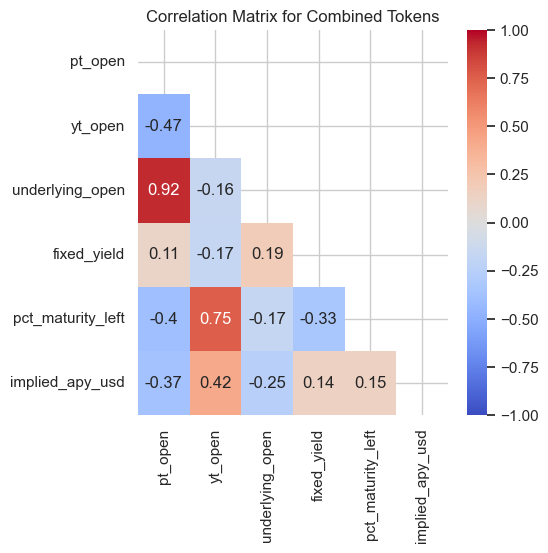

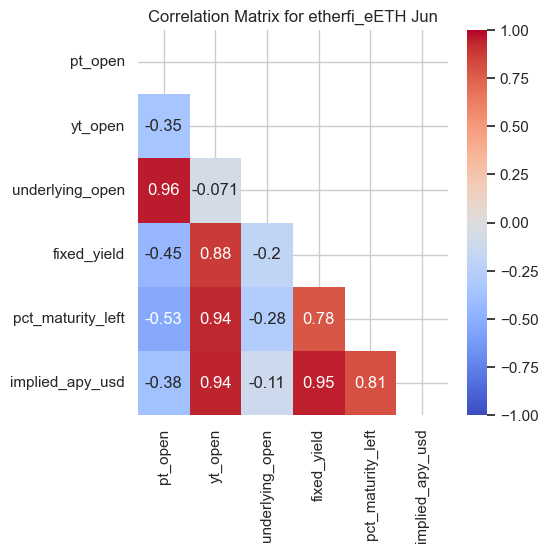

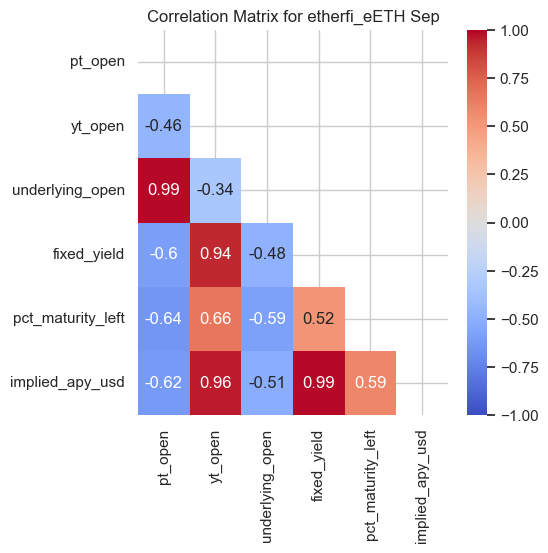

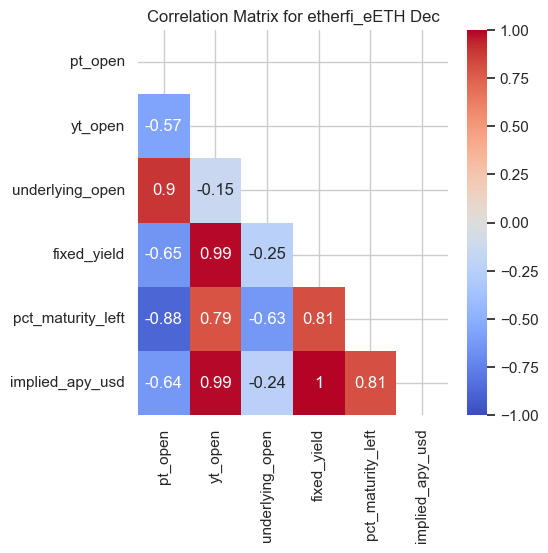

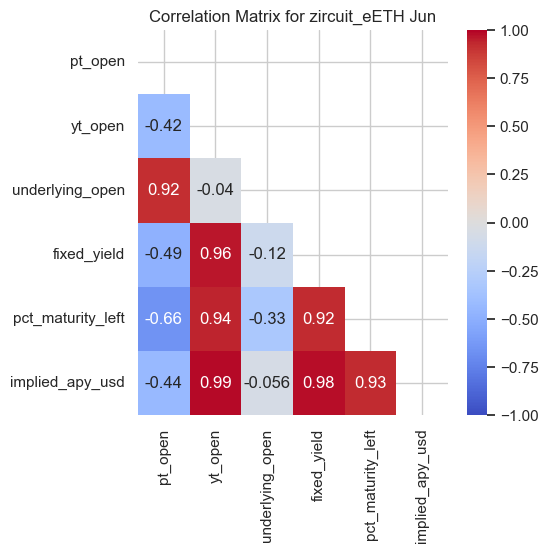

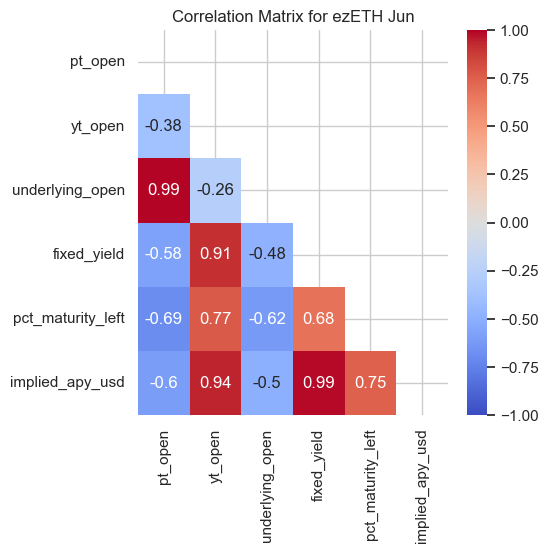

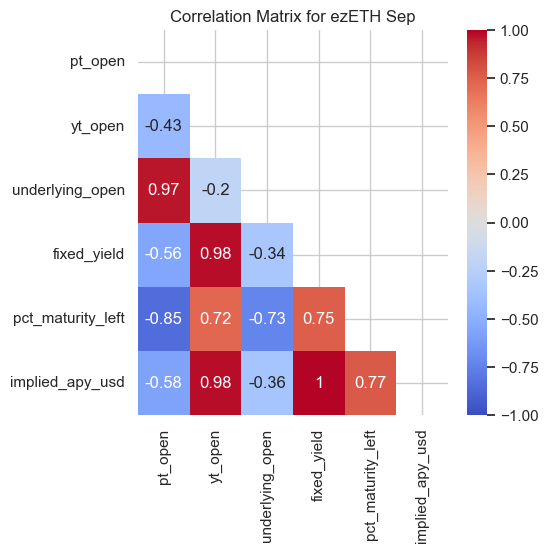

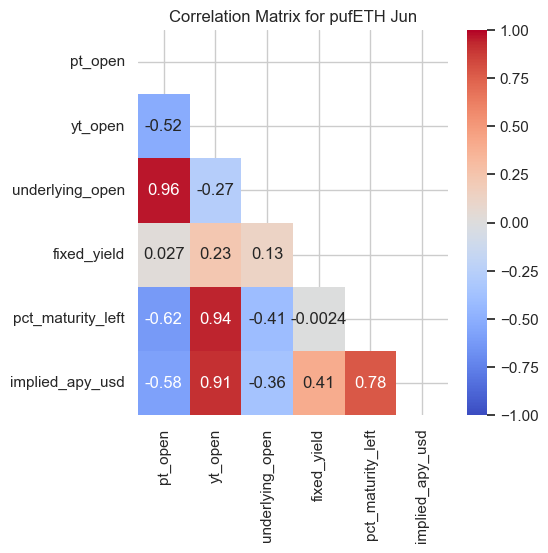

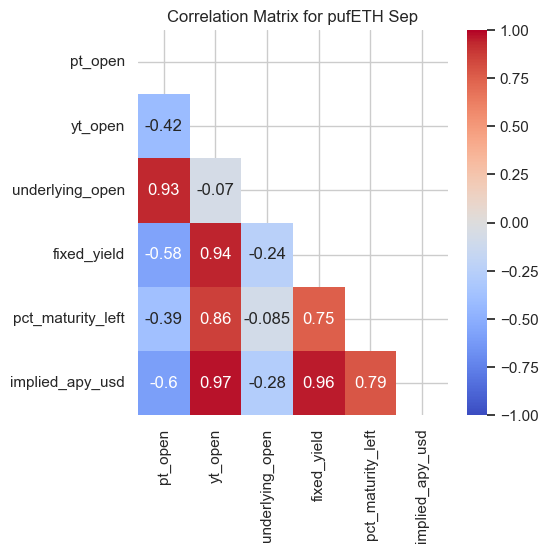

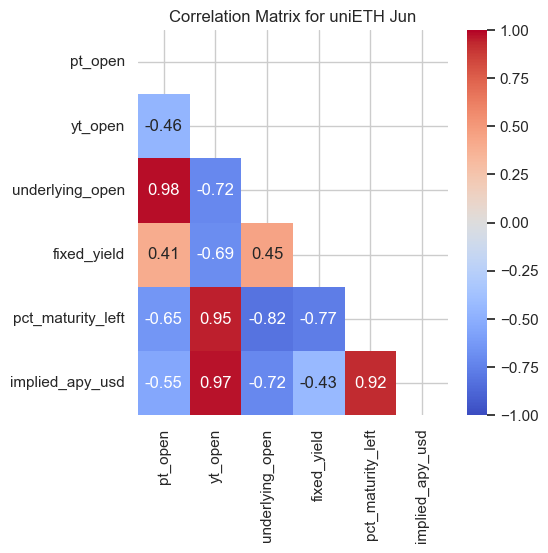

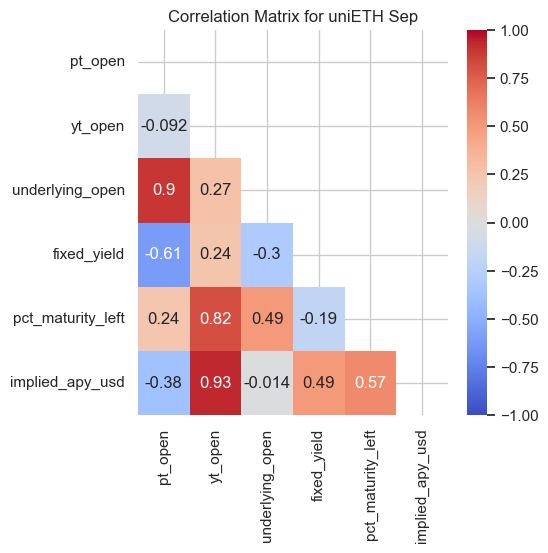

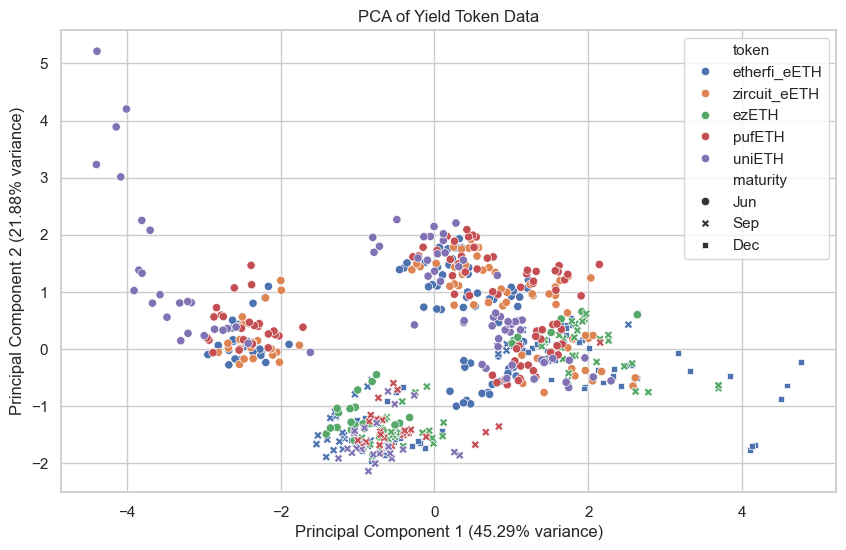

Explained variance ratio: [0.45285725 0.21882036]


,pt_open,yt_open,underlying_open,fixed_yield,pct_maturity_left,implied_apy_usd
PC1,-0.533056,0.466633,-0.429166,-0.185552,0.429782,0.307863
PC2,-0.357283,-0.375725,-0.500597,0.406748,-0.516687,0.219484


In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the data for all tokens and maturities
tokens = {
    'etherfi_eETH': [etherfi_eETH_jun_df, etherfi_eETH_sep_df, etherfi_eETH_dec_df],
    'zircuit_eETH': [zircuit_eETH_jun_df],
    'ezETH': [ezETH_sep_df, ezETH_dec_df],
    'pufETH': [pufETH_jun_df, pufETH_sep_df],
    'uniETH': [uniETH_jun_df, uniETH_sep_df]
}

categories = ['pt_open', 'yt_open', 'underlying_open', 'fixed_yield', 'pct_maturity_left', 'implied_apy_usd']

# Combine data from all tokens for correlation and PCA
combined_df = pd.concat([df.assign(token=token, maturity=maturity)
                         for token, dfs in tokens.items()
                         for maturity, df in zip(['Jun', 'Sep', 'Dec'], dfs)])

# Ensure that we have date_ordinal for PCA
combined_df['date_ordinal'] = combined_df.index.map(datetime.toordinal)

# Check the combined dataframe
print(combined_df.head())

# Perform Correlation Analysis
def plot_correlation_matrix(data, title):
    correlation_matrix = data.corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    plt.figure(figsize=(5, 5))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)
    plt.title(title)
    plt.show()

# Plot the overall correlation matrix
plot_correlation_matrix(combined_df[categories], 'Correlation Matrix for Combined Tokens')

# Plot correlation matrices for individual tokens and maturities
for token, dfs in tokens.items():
    for maturity, df in zip(['Jun', 'Sep', 'Dec'], dfs):
        if not df.empty:
            plot_correlation_matrix(df[categories],
                                    f'Correlation Matrix for {token} {maturity}')

# Handle NaN values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
x = combined_df[categories].values
x = imputer.fit_transform(x)

# Standardize the data
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Create a dataframe with principal components
pca_df = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Reset indices to align properly for concatenation
pca_df.reset_index(drop=True, inplace=True)
combined_df.reset_index(drop=True, inplace=True)

# Concatenate with the combined_df to include token and maturity information
pca_df = pd.concat([pca_df, combined_df[['token', 'maturity']]], axis=1)

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='token', style='maturity', data=pca_df)
plt.title('PCA of Yield Token Data')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.show()

# Print explained variance ratios and components
print("Explained variance ratio:", pca.explained_variance_ratio_)
components_df = pd.DataFrame(pca.components_, columns=categories, index=['PC1', 'PC2'])
components_df


Explained Variance Ratio
The explained variance ratio tells us how much of the total variance in the dataset is captured by each principal component:

PC1 (Principal Component 1) explains 45.29% of the variance.
PC2 (Principal Component 2) explains 21.88% of the variance.
Together, these two components explain approximately 67.17% of the total variance in the data. This means that these two components capture the majority of the information contained in the original variables.

Loadings of Principal Components
The loadings (coefficients) of each variable on the principal components indicate how much each variable contributes to the respective component. Here’s the interpretation for each variable:

PC1:

pt_open: -0.533056
yt_open: 0.466633
underlying_open: -0.429166
fixed_yield: -0.185552
pct_maturity_left: 0.429782
implied_apy_usd: 0.307863
PC2:

pt_open: -0.357283
yt_open: -0.375725
underlying_open: -0.500597
fixed_yield: 0.406748
pct_maturity_left: -0.516687
implied_apy_usd: 0.219484
Key Insights
Drivers of Fixed Yields:

PC1 has significant contributions from pt_open, yt_open, and underlying_open, with pt_open and underlying_open being negatively correlated and yt_open positively correlated. This suggests that these three variables are the primary drivers of the fixed yields.
PC2 indicates that fixed_yield and pct_maturity_left are influential, but in opposite directions. fixed_yield is positively correlated with PC2, while pct_maturity_left is negatively correlated.
Correlation with Token Prices:

The significant loading of pt_open, yt_open, and underlying_open on PC1 indicates that the prices of the principal tokens and the underlying tokens are closely related to the fixed yields.
The positive correlation of yt_open with PC1 suggests that as the yield token price increases, it contributes positively to the fixed yield. Conversely, pt_open and underlying_open contribute negatively, indicating that higher prices of these tokens might correspond to lower fixed yields.
Maturity and Implied APY:

The contribution of pct_maturity_left and implied_apy_usd to both principal components highlights their importance. Specifically, pct_maturity_left shows a significant negative correlation with PC2, indicating that as the percentage of maturity left decreases, it negatively impacts the second principal component.
Conclusion for Question 1
The PCA results suggest that the primary drivers of fixed yields are the prices of the principal tokens (pt_open), yield tokens (yt_open), and the underlying tokens (underlying_open). Additionally, the fixed yields are influenced by the remaining time to maturity (pct_maturity_left) and the implied annual percentage yield (implied_apy_usd).

The correlation analysis and PCA together indicate that:

Fixed yields are significantly influenced by the prices of both principal and yield tokens.
The maturity period and implied APY are also important factors.
Positive and negative correlations with the principal components highlight how these variables interact with each other.
These insights help in understanding the dynamics of fixed yields in the context of Pendle tokens and can guide further analysis and strategy development.

## Correlation of LRTs between one another

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from itertools import combinations

sns.set(style='whitegrid')

# Assuming prepare_token_data function is defined and imported as before

# Load the data for all tokens and maturities
tokens = {
    'etherfi_eETH': [etherfi_eETH_jun_df, etherfi_eETH_sep_df, etherfi_eETH_dec_df],
    'zircuit_eETH': [zircuit_eETH_jun_df],
    'ezETH': [ezETH_sep_df, ezETH_dec_df],
    'pufETH': [pufETH_jun_df, pufETH_sep_df],
    'uniETH': [uniETH_jun_df, uniETH_sep_df]
}

# Combine data from all tokens
combined_df = pd.concat([df.assign(token=token, maturity=maturity)
                         for token, dfs in tokens.items()
                         for maturity, df in zip(['Jun', 'Sep', 'Dec'], dfs)])

# Calculate price ratios between selected tokens
def calculate_price_ratios(df1, df2, label1, label2):
    df1 = df1.copy()
    df2 = df2.copy()
    df1['ratio_pt'] = df1['pt_open'] / df2['pt_open']
    df1['ratio_yt'] = df1['yt_open'] / df2['yt_open']
    df1['ratio_underlying'] = df1['underlying_open'] / df2['underlying_open']
    df1['label'] = f'{label1}/{label2}'
    return df1[['ratio_pt', 'ratio_yt', 'ratio_underlying', 'label']]

# Function to calculate all pairs of price ratios for a given maturity
def calculate_all_price_ratios_for_maturity(maturity):
    maturity_df = combined_df[combined_df['maturity'] == maturity]
    tokens_for_maturity = maturity_df['token'].unique()
    pairs = list(combinations(tokens_for_maturity, 2))
    
    all_ratios = []
    for token1, token2 in pairs:
        df1 = maturity_df[maturity_df['token'] == token1]
        df2 = maturity_df[maturity_df['token'] == token2]
        if not df1.empty and not df2.empty:
            ratios_df = calculate_price_ratios(df1, df2, f'{token1}_{maturity}', f'{token2}_{maturity}')
            all_ratios.append(ratios_df)
    
    return pd.concat(all_ratios)

# Calculate price ratios for each maturity
ratios_jun_df = calculate_all_price_ratios_for_maturity('Jun')
ratios_sep_df = calculate_all_price_ratios_for_maturity('Sep')
ratios_dec_df = calculate_all_price_ratios_for_maturity('Dec')

# Combine all ratios dataframes
all_ratios_df = pd.concat([ratios_jun_df, ratios_sep_df, ratios_dec_df])

# Calculate correlation matrix of price ratios
correlation_matrix_ratios = all_ratios_df[['ratio_pt', 'ratio_yt', 'ratio_underlying']].corr()

# Plot the correlation matrix of price ratios
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_ratios, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Price Ratios Between Tokens with Same Maturity')
plt.show()


NameError: name 'ratios_dec_df' is not defined